In [9]:
# -*- coding:utf-8 -*-
# Author : Younger Huang
# Date : 2023.11.16

import os, librosa
import numpy as np
import soundfile as sf
from scipy.linalg import hankel

def bnlms(x, d, N = 4, L = 4, mu = 0.1, beta = 0.9):
    nIters = min(len(x), len(d)) // L
    u = np.zeros(L + N - 1)
    h = np.zeros(N)
    e = np.zeros(nIters * L)
    norm = np.full(L, 1e-3)
    for n in range(nIters):
        u[:-L] = u[L:]
        u[-L:] = x[n * L : (n + 1) * L]
        d_n = d[n * L : (n + 1) * L]
        A = hankel(u[:L], u[-N:])
        e_n = d_n - np.dot(A, h)
        norm = beta * norm + (1 - beta) * (np.sum(A ** 2, axis = 1))
        h = h + mu * np.dot(A.T / (norm + 1e-3), e_n) / L
        e[n * L : (n + 1) * L] = e_n
    return e

if __name__ == '__main__':
    x, sr = librosa.load(r'./res_6/x.wav', sr = 16000)
    v, sr = librosa.load(r'./res_6/d.wav', sr = 16000)
    e = bnlms(x, v, N = 256, L = 4, mu = 0.1)
    out_res_dir = './res_10_bnlms/'
    os.makedirs(out_res_dir, exist_ok = True)
    sf.write('%sx.wav'%(out_res_dir), x, sr, subtype = 'PCM_16')
    sf.write('%sd.wav'%(out_res_dir), v, sr, subtype = 'PCM_16')
    sf.write('%sbnlms.wav'%(out_res_dir), e, sr, subtype = 'PCM_16')

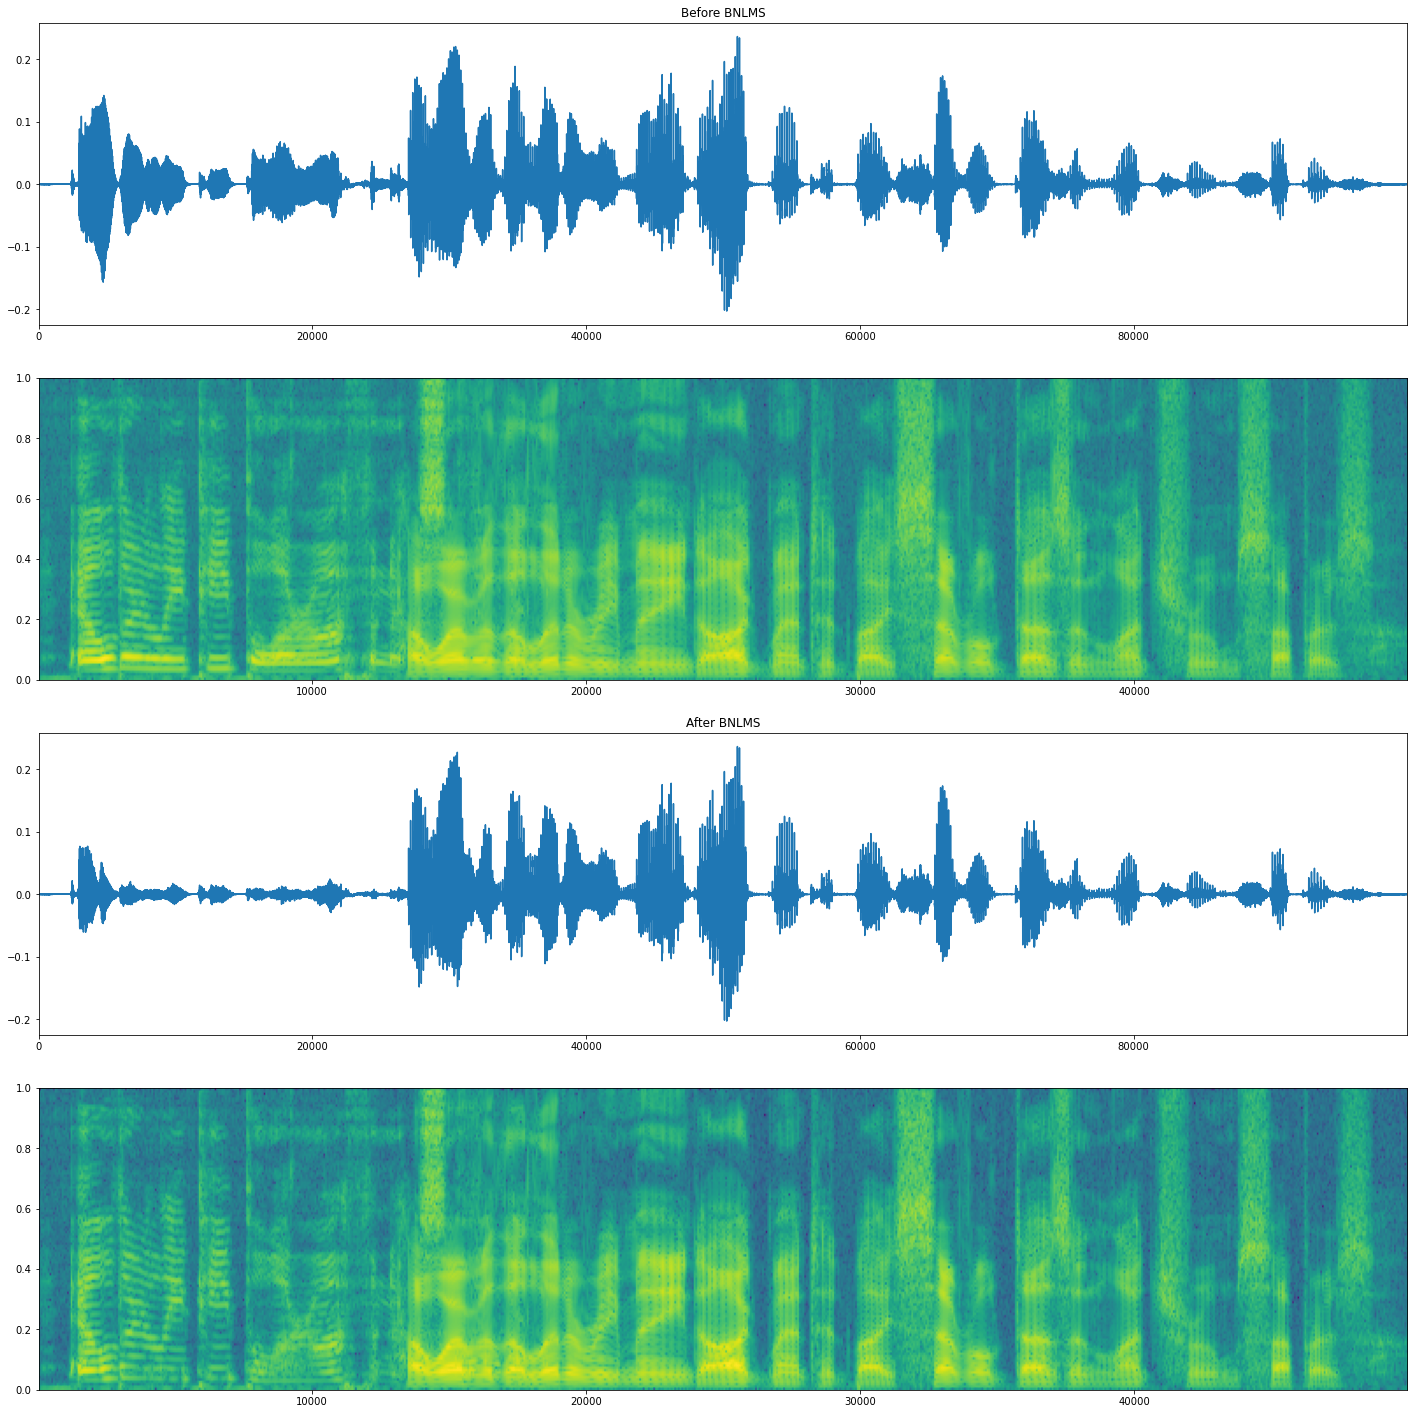

In [4]:
import matplotlib.pyplot as plt

before_lms = './res_10_bnlms/d.wav'
after_lms = './res_10_bnlms/bnlms.wav'
before_lms_wav = sf.read(before_lms)[0]
after_lms_wav = sf.read(after_lms)[0]

plt.figure(figsize = (20, 20))
plt.subplot(411)
plt.plot(before_lms_wav)
plt.xlim((0, len(before_lms_wav)))
plt.title('Before BNLMS')
plt.subplot(412)
plt.specgram(before_lms_wav)
plt.subplot(413)
plt.plot(after_lms_wav)
plt.xlim((0, len(after_lms_wav)))
plt.title('After BNLMS')
plt.subplot(414)
plt.specgram(after_lms_wav)
plt.tight_layout(pad = 2, w_pad = 2)
plt.savefig('./before_after_bnlms_comp.png', dpi = 400)
plt.show()
